In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [10]:
c = 3.*10**8
boxsize = 25.e3

with h5py.File(r'C:\Users\tirth\OneDrive\Desktop\Projects\Halo - galaxy connection\CAMELS_data\Astrid_SB7_14_groups_090.hdf5', 'r') as f:
    # Halo data
    M_h  = f['Group/Group_M_Crit200'][:]*1e10
    ID_r = f['Group/GroupFirstSub'][:]
    ID_h = np.arange(0, M_h.shape[0], 1, dtype = float)
    
    # Galaxy data
    SM     = f['Subhalo/SubhaloMassType'][:,4]*1e10
    Colour = f['Subhalo/SubhaloStellarPhotometrics'][:, 4] - f['Subhalo/SubhaloStellarPhotometrics'][:, 5]
    SFR    = f['Subhalo/SubhaloSFR'][:]*1e10
    SR     = f['Subhalo/SubhaloHalfmassRadType'][:, 4]
    ID_g   = np.array(f['Subhalo/SubhaloGrNr'])

# Step 1: Get halos that have galaxies
halo_indexes = np.where(ID_r != -1)[0]

# Step 2: Get the central galaxy indices for these halos
central_galaxy_indexes = ID_r[halo_indexes].astype(int)

# Step 3: Filter to centrals with SM > 1e7
valid_centrals_mask = SM[central_galaxy_indexes] > 1e7
central_galaxy_indexes = central_galaxy_indexes[valid_centrals_mask]

# Step 4: Extract galaxy data using central galaxy indices
SM     = SM[central_galaxy_indexes]
Colour = Colour[central_galaxy_indexes]
SFR    = SFR[central_galaxy_indexes]
SR     = SR[central_galaxy_indexes]
ID_g   = ID_g[central_galaxy_indexes]

data    = np.array([ID_g, SM, SR, SFR, Colour]).T
columns = ['ID', 'SM', 'SR', 'SFR', 'Colour'] 
gals    = pd.DataFrame(data = data, columns = columns)

gals['SFR'] = gals['SFR'].replace(0, 1)
gals['SFR'] = np.log10(gals['SFR'])
gals.loc[gals['SFR'] == 0, "SFR"] = np.random.normal(6.4, 0.5, len(gals.loc[gals["SFR"] == 0]))

gals['SM'] = np.log10(gals['SM'] + 0.001)
#gals['BMM'] = np.log10(gals['BMM'] + 0.001)

In [11]:
gals.head()

,ID,SM,SR,SFR,Colour
0,0.0,10.830122,20.715139,9.456017,0.0
1,1.0,11.170563,8.163291,5.800913,0.0
2,2.0,11.215739,21.937384,11.436665,0.0
3,3.0,10.504306,11.848398,11.060204,0.0
4,4.0,10.504979,6.582431,11.325426,0.0


Text(0.5, 0, 'SFR')

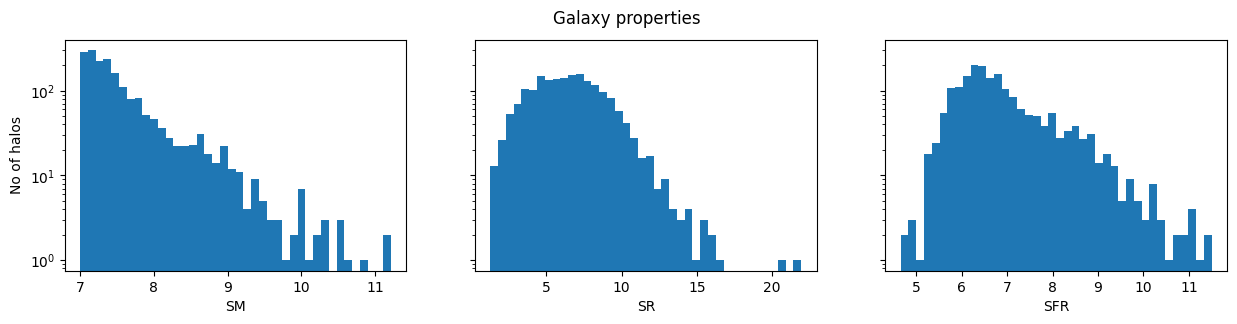

In [12]:
fig, axs = plt.subplots(1, 3, figsize = (15, 3), sharey = True, dpi = 100)

fig.suptitle('Galaxy properties')

axs[0].hist(gals['SM'], bins = 40)
axs[0].set_yscale('log')
axs[0].set_xlabel('SM')
axs[0].set_ylabel('No of halos')

axs[1].hist(gals['SR'], bins = 40)
axs[1].set_yscale('log')
axs[1].set_xlabel('SR')

axs[2].hist(gals['SFR'], bins = 40)
axs[2].set_yscale('log')
axs[2].set_xlabel('SFR')